In [1]:
import boto3
#import diff_classifier.aws as aws
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from diff_classifier.features import calculate_features
from os import listdir, getcwd, chdir
from os.path import isfile, join
import os
#import diff_predictor
from diff_predictor import spatial, core, data_process
from matplotlib import colors as plt_colors
import altair as alt

Using current directory for loading/saving: /mnt/batch/tasks/shared/LS_root/mounts/clusters/nance8core/code/Users/nlsschim/diff_predictor/notebooks
To change current directory, call change_dir(...)


In [9]:
workbookDir = getcwd()
print('Current Notebook Dir: ' + workbookDir)
chdir(workbookDir) # Go to current workbook Dir
chdir('..')        # Go up one
print(f'Using current directory for loading data: {getcwd()}')
workbookDir = getcwd()

Current Notebook Dir: /mnt/batch/tasks/shared/LS_root/mounts/clusters/nance8core/code/Users
Using current directory for loading data: /mnt/batch/tasks/shared/LS_root/mounts/clusters/nance8core/code


In [10]:
# msd_path = workbookDir + '/Users//'
# msd_filelist = [f for f in listdir(msd_path) if isfile(join(msd_path, f)) and 'msd' in f]
# print(len(msd_filelist))

dataset_path = workbookDir + '/Users/nlsschim/diff_predictor/data/features_ecm/'
filelist = [f for f in listdir(dataset_path) if isfile(join(dataset_path, f)) and 'feat' in f]
print(len(filelist))

180


In [6]:
# This cell runs a for loop to calculate the diffusion coefficient at different times

# for file in msd_filelist:
# #for i in range(67,180):
#     msd_df = pd.read_csv(msd_path+str(file))
#     print('starting: ' + file)
#     fea_df_v1 = calculate_features(msd_df, frame=(10, 20), mean_values=True) # deff2 @0.67s
#     fea_df_v2 = calculate_features(msd_df, frame=(10, 15), mean_values=True) #deff2 @0.5s
#     path = workbookDir
#     fname = 'features' + file[3:]
#     full_stv1 = path + '/Users/nlsschim/0.5_features/' + fname
#     full_stv2 = path + '/Users/nlsschim/0.67_features/' + fname
#     fea_df_v1.to_csv(full_stv1)
#     fea_df_v2.to_csv(full_stv2)
#     print(fname)
#     print('')
    

In [11]:
fstats_tot = data_process.generate_fullstats(dataset_path, filelist, ['HYase', 'ChABC','NT'], 'Treatment')

features_ChABC_brain_1_slice_1_vid_1.csv size: (502, 67)
features_ChABC_brain_1_slice_1_vid_2.csv size: (1734, 67)
features_ChABC_brain_1_slice_1_vid_3.csv size: (593, 67)
features_ChABC_brain_1_slice_1_vid_4.csv size: (258, 67)
features_ChABC_brain_1_slice_1_vid_5.csv size: (888, 67)
features_ChABC_brain_1_slice_2_vid_1.csv size: (1350, 67)
features_ChABC_brain_1_slice_2_vid_2.csv size: (690, 67)
features_ChABC_brain_1_slice_2_vid_3.csv size: (1257, 67)
features_ChABC_brain_1_slice_2_vid_4.csv size: (1070, 67)
features_ChABC_brain_1_slice_2_vid_5.csv size: (1097, 67)
features_ChABC_brain_1_slice_3_vid_1.csv size: (1141, 67)
features_ChABC_brain_1_slice_3_vid_2.csv size: (1307, 67)
features_ChABC_brain_1_slice_3_vid_3.csv size: (650, 67)
features_ChABC_brain_1_slice_3_vid_4.csv size: (1594, 67)
features_ChABC_brain_1_slice_3_vid_5.csv size: (1212, 67)
features_ChABC_brain_2_slice_1_vid_1.csv size: (1133, 67)
features_ChABC_brain_2_slice_1_vid_2.csv size: (2291, 67)
features_ChABC_brain

features_NT_brain_2_slice_2_vid_5.csv size: (2100, 67)
features_NT_brain_2_slice_3_vid_1.csv size: (562, 67)
features_NT_brain_2_slice_3_vid_2.csv size: (853, 67)
features_NT_brain_2_slice_3_vid_3.csv size: (817, 67)
features_NT_brain_2_slice_3_vid_4.csv size: (598, 67)
features_NT_brain_2_slice_3_vid_5.csv size: (1062, 67)
features_NT_brain_3_slice_1_vid_1.csv size: (2917, 67)
features_NT_brain_3_slice_1_vid_2.csv size: (2268, 67)
features_NT_brain_3_slice_1_vid_3.csv size: (3859, 67)
features_NT_brain_3_slice_1_vid_4.csv size: (3271, 67)
features_NT_brain_3_slice_1_vid_5.csv size: (3054, 67)
features_NT_brain_3_slice_2_vid_1.csv size: (840, 67)
features_NT_brain_3_slice_2_vid_2.csv size: (572, 67)
features_NT_brain_3_slice_2_vid_3.csv size: (886, 67)
features_NT_brain_3_slice_2_vid_4.csv size: (364, 67)
features_NT_brain_3_slice_2_vid_5.csv size: (893, 67)
features_NT_brain_3_slice_3_vid_1.csv size: (596, 67)
features_NT_brain_3_slice_3_vid_2.csv size: (378, 67)
features_NT_brain_3_s

In [12]:
fstats_tot.tail()

,Track_ID,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,boundedness,...,Mean Mean_Intensity,Std Mean_Intensity,Mean SN_Ratio,Std SN_Ratio,Mean Deff1,Std Deff1,Mean Deff2,Std Deff2,Treatment,Video Number
215888,1871.0,1.437894,1.878042,2.161579,0.586254,0.364298,0.114914,1.703328,0.412914,0.104360,...,NaN,NaN,0.656522,0.076314,2.401253,1.573405,NaN,NaN,NT,179
215889,1872.0,0.137164,30.508017,2.022545,0.949061,0.114323,0.379597,2.174046,0.540028,0.144299,...,NaN,NaN,0.843137,0.109015,5.000972,2.631676,1.529161,0.772844,NT,179
215890,1873.0,1.787813,0.143032,1.501659,0.706242,0.294501,0.160768,1.474390,0.321754,0.057245,...,NaN,NaN,0.681664,0.113165,1.825089,1.302180,1.340502,0.287351,NT,179
215891,1874.0,1.482143,1.753419,1.756550,0.983391,0.064709,0.487493,3.421029,0.707690,0.070868,...,NaN,NaN,0.656522,0.076314,2.401253,1.573405,NaN,NaN,NT,179
215892,1875.0,0.330237,13.753847,1.982284,0.446494,0.445977,0.076234,1.005799,0.005766,0.112094,...,NaN,NaN,0.835502,0.033991,3.171243,3.065146,0.002365,0.000000,NT,179


In [40]:
fstats_nozero = fstats_tot[fstats_tot['Deff1'] > 0]
fstats_nozero['log Deff1'] = np.log10(fstats_nozero['Deff1'])

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


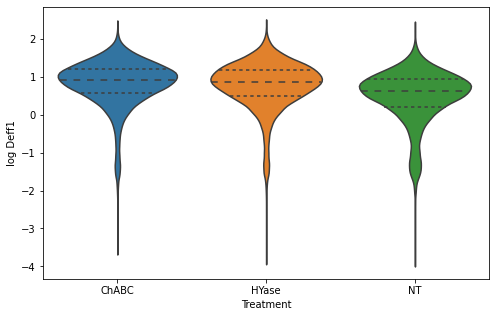

In [42]:
def generate_violinplot(x, y, data, quartile_style='quartile'):

    fig = plt.figure(figsize=(8,5))

    sns.violinplot(x=x, y=y, data=data, inner=quartile_style)
    #plt.title('Diffusion Coefficients of Treatment Groups')
    
    
generate_violinplot('Treatment', 'log Deff1', fstats_nozero, 'quartile')

In [66]:
data_list = []

nt_data = fstats_tot[fstats_tot['Treatment'] == 'NT']

nt_data = nt_data[nt_data['Deff1'] > 0]
nt_data = np.array(np.log(nt_data['Deff1'].dropna()))
data_list.append(nt_data)


chabc_data = fstats_tot[fstats_tot['Treatment'] == 'ChABC']
chabc_data = chabc_data[chabc_data['Deff1'] > 0]

chabc_data = np.array(np.log(chabc_data['Deff1'].dropna()))
data_list.append(chabc_data)


hyase_data = fstats_tot[fstats_tot['Treatment'] == 'HYase']
hyase_data = hyase_data[hyase_data['Deff1'] > 0]


hyase_data = np.array(np.log(hyase_data['Deff1'].dropna()))

data_list.append(hyase_data)



0.4910998351852662
1.4280036569832608
2.1554566569278277
[[-0.51744951  0.78873111]]


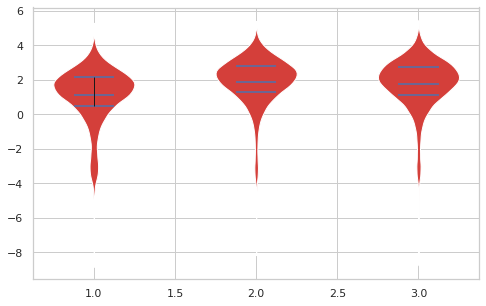

In [68]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


# def set_axis_style(ax, labels):
#     ax.get_xaxis().set_tick_params(direction='out')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.set_xticks(np.arange(1, len(labels) + 1))
#     ax.set_xticklabels(labels)
#     ax.set_xlim(0.25, len(labels) + 0.75)
#     ax.set_xlabel('Sample name')


fig = plt.figure(figsize=(8,5))
#plt.yscale('log')
#plt.ylim(10**-3, 10**2)
plt.axes()




parts = plt.violinplot(data_list, showmeans=True, showextrema=False, quantiles=[[0.25, 0.75], [0.25, 0.75], [0.25, 0.75]])
for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    #pc.set_edgecolor('black')
    pc.set_alpha(1)
    
quartile1, medians, quartile3 = np.percentile(nt_data, [25, 50, 75])
print(quartile1)
print(medians)
print(quartile3)
whiskers = np.array([adjacent_values(nt_data, quartile1, quartile3)])
print(whiskers)
#     for sorted_array, q1, q3 in zip(nt_data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, 4)
#plt.scatter(1, medians, marker='o', color='white', s=10, zorder=3)
#ax1.axhline(1, xmin=0.25, xmax=0.75, color='k', linestyle='-', lw=5)
plt.vlines(1, quartile1, quartile3, color='k', linestyle='-', lw=1)


#axs[1].violinplot(chabc_data, showmeans=True, showextrema=False)


#axs[2].violinplot(hyase_data, showmeans=True, showextrema=False)


plt.show()

[-0.6626138  -1.32421006 -1.33282218 -3.03203139]
[-0.00051949  0.01508553  0.29930292 -0.15551055]
[0.71709805 1.30451429 2.19869123 3.05844213]
4
100
100
100
100
[1 2 3 4]


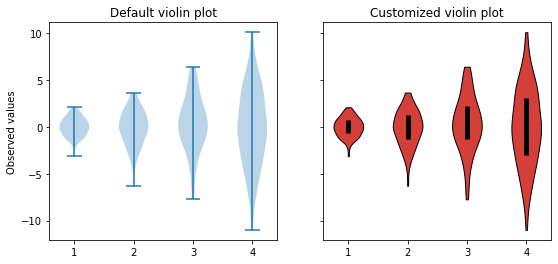

In [144]:
# create test data

def adjacent_values(vals, q1, q3):
    print(len(vals))
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')
    
    
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
ax1.violinplot(data)

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    
quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
print(quartile1)
print(medians)
print(quartile3)
print(len(data))
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
print(inds)
#ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
#ax2.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

In [ ]:
alt.data_transformers.disable_max_rows()
chart = alt.Chart(fstats_tot).mark_boxplot().encode(
    x='Deff1:Q',
    y='Treatment:N'
)
chart

In [23]:
alt.data_transformers.disable_max_rows()
alt.Chart(fstats_tot).transform_density(
    'Deff1',
    as_=['Deff1', 'density'],
    extent=[0,100],
    groupby=['Treatment']
).mark_area(orient='horizontal').encode(
    y='Deff1:Q',
    color='Treatment:N',
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        #axis=alt.axis(labels=False, values=[0],grid=False,ticks=True),
    )#,
#     columns=alt.Column(
#         'Treatment:N',
#         header=alt.Header(
#             titleOrient='bottom',
#             labelOrient='bottom',
#             labelPadding=0,
#         ),
#     )
).properties(
    width=100
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)